In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv("datasets/telomerase_06_descriptors.csv")
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.136677
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.022276
4,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.221849
661,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.040959
662,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.251812
663,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.008774


In [3]:
df = df.dropna()
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.136677
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.022276
4,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.221849
661,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.040959
662,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.251812
663,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.008774


In [4]:
X = df.drop("pIC50", axis=1)
y = df["pIC50"]

In [5]:
X.shape

(664, 881)

Remove low variance features

In [6]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(664, 146)

Split the train and test set

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Model Training

Train a XGBRegressor model

In [22]:
regressor = XGBRegressor()
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [23]:
y_train_pred = regressor.predict(X_train)

In [24]:
print(f"Training R2 = {r2_score(y_train, y_train_pred):.3f}")
print(f"Training RMSE = {mean_squared_error(y_train, y_train_pred, squared=False):.3f}")

Training R2 = 0.885
Training RMSE = 0.322


## Model Evaluation

Predict on test set

In [25]:
y_test_pred = regressor.predict(X_test)

In [26]:
print(f"Testing R2 = {r2_score(y_test, y_test_pred):.3f}")
print(f"Testing RMSE = {mean_squared_error(y_test, y_test_pred, squared=False):.3f}")

Testing R2 = 0.039
Testing RMSE = 0.980


<function matplotlib.pyplot.show(close=None, block=None)>

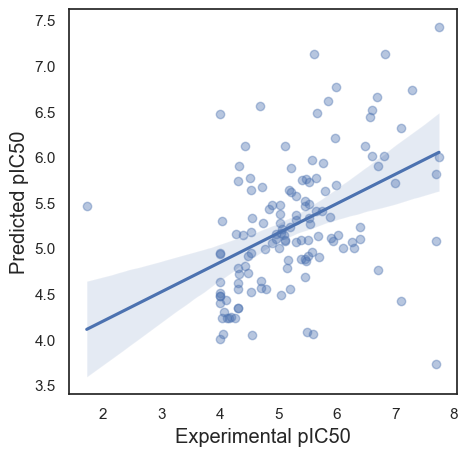

In [15]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_test_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large')
ax.set_ylabel('Predicted pIC50', fontsize='large')
ax.figure.set_size_inches(5, 5)
plt.show

## Use LazyPredict

In [16]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [17]:
regressor = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = regressor.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = regressor.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:11<00:00,  3.80it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:11<00:00,  3.79it/s]


In [18]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.81,0.86,0.36,0.01
ExtraTreeRegressor,0.81,0.86,0.36,0.01
ExtraTreesRegressor,0.81,0.86,0.36,0.45
GaussianProcessRegressor,0.81,0.86,0.36,0.06
XGBRegressor,0.81,0.86,0.36,0.07
RandomForestRegressor,0.69,0.77,0.46,0.48
BaggingRegressor,0.67,0.76,0.47,0.05
MLPRegressor,0.61,0.72,0.51,0.47
HistGradientBoostingRegressor,0.53,0.66,0.56,0.77


In [19]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,508422139911374930354110464.00,-53923560293630669746077696.00,7282570748214.10,0.02
TransformedTargetRegressor,6308533518997717491122176.00,-669086888378545729437696.00,811216345296.30,0.03
LinearRegression,6308533518997717491122176.00,-669086888378545729437696.00,811216345296.30,0.02
RANSACRegressor,5223647105971100871294976.00,-554023177906025809313792.00,738175114475.01,0.92
KernelRidge,281.51,-28.75,5.41,0.01
GaussianProcessRegressor,160.08,-15.87,4.07,0.04
PassiveAggressiveRegressor,14.55,-0.44,1.19,0.01
DecisionTreeRegressor,11.10,-0.07,1.03,0.01
QuantileRegressor,10.44,-0.00,0.99,4.00


[(0.0, 1.0)]

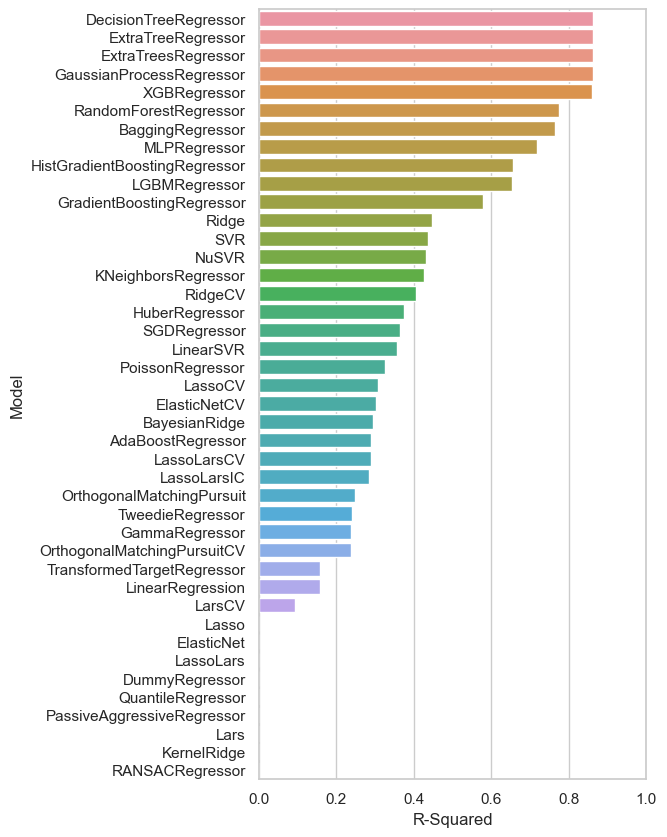

In [20]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

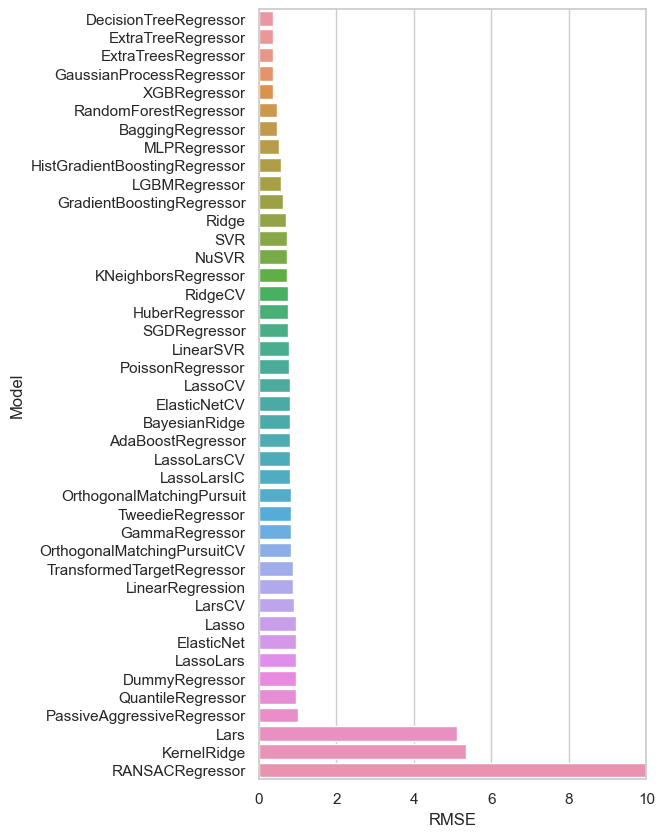

In [29]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

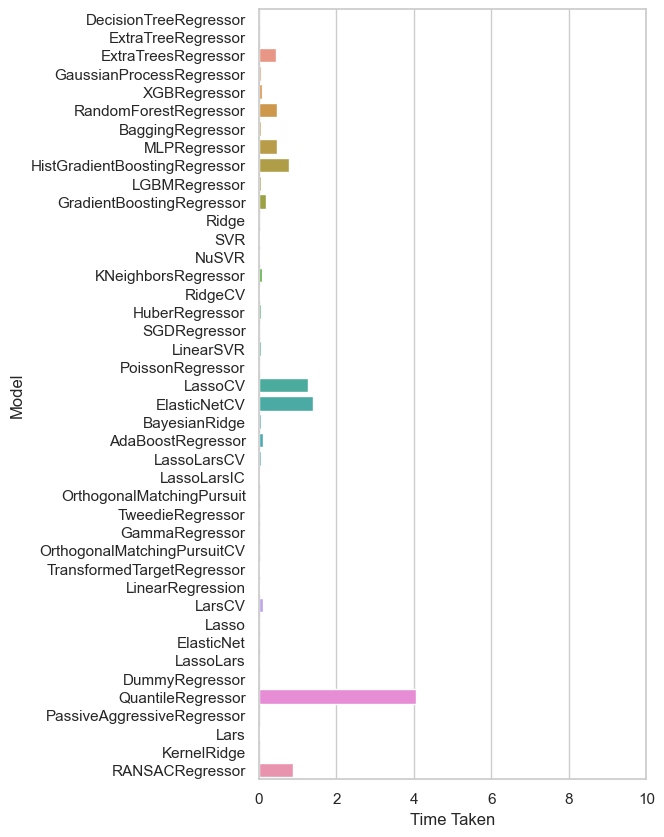

In [30]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))